# Don't Overfit Challenge 

### Referências

* https://www.kaggle.com/c/dont-overfit-ii

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

## Visualização dos Dados

In [2]:
train = pd.read_csv(r'C:\Users\LENOVO\Downloads\dont-overfit-ii\train.csv')
test = pd.read_csv(r'C:\Users\LENOVO\Downloads\dont-overfit-ii\test.csv')

In [3]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [4]:
test.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


In [11]:
train.isnull().any().any(), test.isnull().any().any()

(False, False)

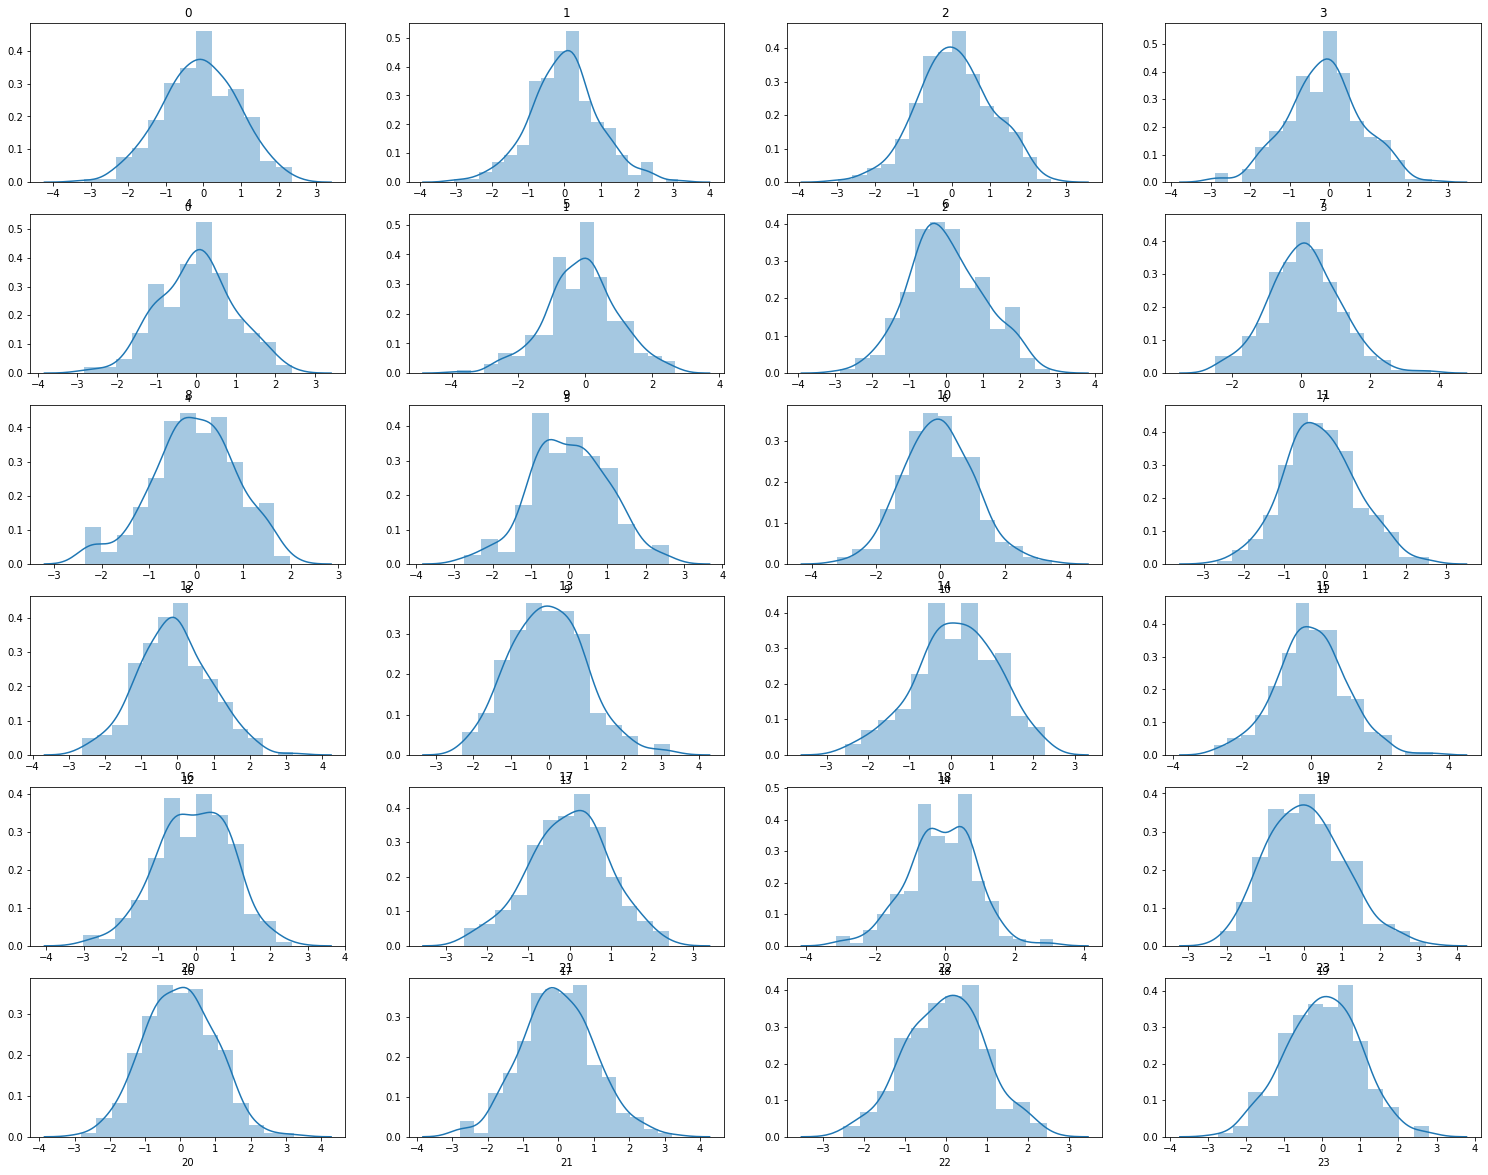

In [18]:
\# Verificando a forma da distribuição
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train.columns)[2:26]):
    plt.subplot(7, 4, i + 1)
    sns.distplot(train[col])
    plt.title(col)

In [19]:
# Verificando os valores de inclinação da normal
train.skew()

id        0.000000
target    1.053933
0        -0.104484
1         0.063733
2        -0.058226
            ...   
295      -0.072132
296      -0.129076
297      -0.022566
298      -0.042284
299      -0.140764
Length: 302, dtype: float64

In [25]:
cols_to_normalize = []
for col in train.columns:
    if (train[col].skew() > 0.5) | (train[col].skew() < -0.5):
        cols_to_normalize.append(col)

In [29]:
cols_to_normalize

['target']

## Modelagem básica e análise de variáveis
#### Como a única coluna que não esta normalmente distribuida é a target, podemos passar para a modelagem inical

In [34]:
X_train = train.drop(['id','target'], axis=True)
y = train['target']
X_test = test.drop('id', axis=True)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
# Importando as bibliotecas para cada modelo 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# criando uma lista com todos os modelos
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
]

In [102]:
# Importando as bibliotecas para Validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [103]:
# Definindo a validação cruzada
kf = StratifiedKFold(n_splits=5)

In [104]:
# Rodando todos os modelos classificadores na validação cruzada
for clf in classifiers:
    score = cross_val_score(clf, X_train, y, cv=kf, scoring='accuracy')
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print(np.mean(score).round(3))

KNeighborsClassifier
0.676
LogisticRegression
0.704
DecisionTreeClassifier
0.664


In [88]:
# Iremos utilizar o RandomForest por ter suporte no eli5
model = LogisticRegression()
model.fit(X_train, y)

LogisticRegression()

In [91]:
# Find best hyperparameters (roc_auc)
random_state = 42
log_clf = LogisticRegression(random_state = random_state)
param_grid = {'class_weight' : ['balanced', None], 
                'penalty' : ['l2','l1'],  
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)

grid.fit(X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   48.9s


Best Score:0.7073878823878824
Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   49.3s finished


In [106]:
model = LogisticRegression(**best_parameters)
model.fit(X,y)

selector = RFE(log_clf, 25, step=1)
selector.fit(X,y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=25)

In [108]:
submission = pd.read_csv(r"C:\Users\LENOVO\Downloads\dont-overfit-ii\sample_submission.csv")
submission['target'] = selector.predict(X_test)
submission.to_csv('submission.csv', index=False)